In [187]:
#Goal of Miniproject 1 is to analyse hotel bookings

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
bookings=pd.read_csv('/Users/dmitry/Downloads/2_bookings.csv',sep=';')

In [189]:
bookings.head()

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


In [190]:
#How many rows and columns in the dataframe?

In [191]:
print('There are {} rows and {} columns in the dataframe'. \
      format(bookings.shape[0], bookings.shape[1]))

There are 119390 rows and 21 columnds in the dataframe


In [192]:
#What is the datatype of the majority of variables?

In [193]:
bookings.dtypes.value_counts()

object     10
int64      10
float64     1
dtype: int64

In [194]:
#Change the name of columns to lowercases and replace " " with "_"

In [195]:
old_names=bookings.columns.to_list()
new_names=[]
for i in old_names:
    new_names.append(i.lower().replace(' ','_'))
rename_dictionary=dict(zip(old_names,new_names))
bookings=bookings.rename(columns=rename_dictionary)

In [196]:
#Users of which countries had made the most successful bookings? 
#Print Top-5

In [197]:
bookings_not_canceled=bookings.query('is_canceled==0')
bookings.groupby('country',as_index=False).count() \
[['country','is_canceled']].sort_values('is_canceled',ascending=False).head()

,country,is_canceled
135,PRT,48590
59,GBR,12129
56,FRA,10415
51,ESP,8568
43,DEU,7287


In [198]:
#What is the average number of stays by hotel type? Round it to two number after comma

In [199]:
bookings.groupby(['hotel']).agg({'stays_total_nights':'mean'}).round(2)

,stays_total_nights
hotel,
City Hotel,2.98
Resort Hotel,4.32


In [200]:
#How many times has assigned room type differed from the reseverved one?

In [201]:
bookings.query('assigned_room_type!=reserved_room_type').shape

(14917, 21)

In [202]:
#Which month had the most bookings by year?

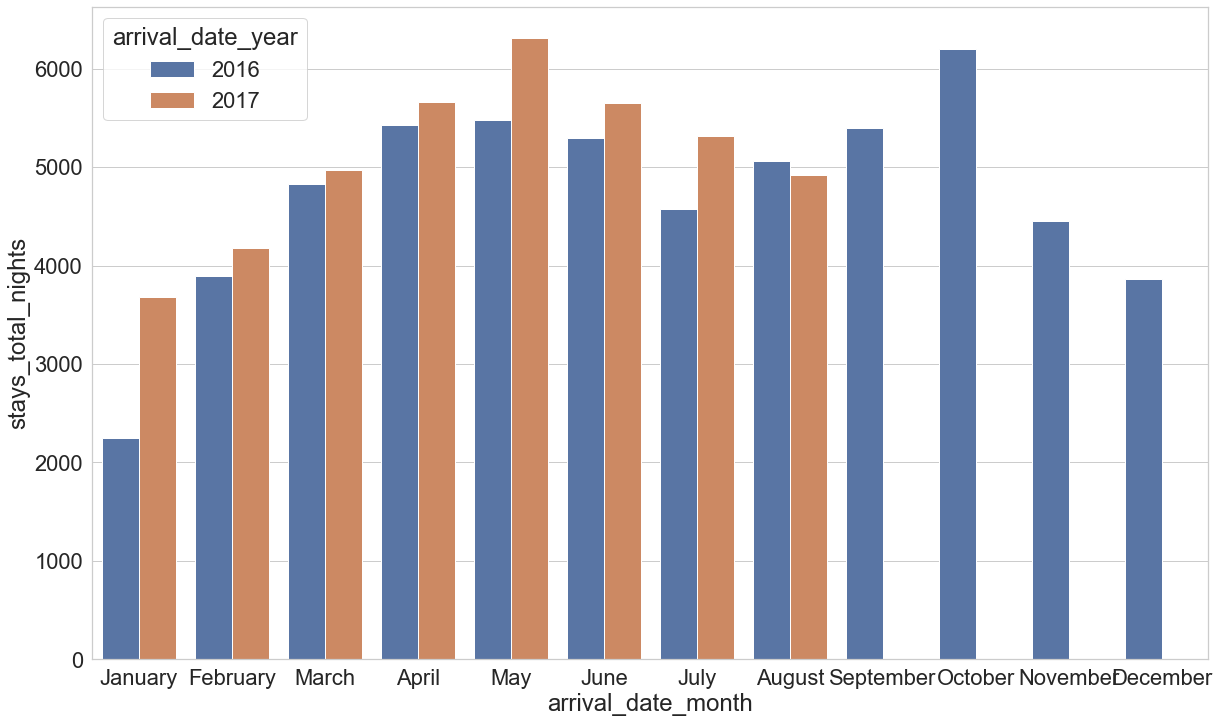

In [203]:
year_month=bookings.query('arrival_date_year==2016 |arrival_date_year==2017'). \
           groupby(['arrival_date_year','arrival_date_month'],as_index=False).count()\
           [['arrival_date_year','arrival_date_month','stays_total_nights']]
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,12)}
        )
sns.barplot(x='arrival_date_month', y='stays_total_nights',hue='arrival_date_year',data=year_month,\
           order=['January','February','March','April','May','June','July','August',
                 'September','October','November','December'])
plt.show()

In [204]:
# For City Hotel type, which month had the most cancellations?

In [205]:
bookings.query('is_canceled==1 & hotel=="City Hotel"'). \
groupby('arrival_date_year') \
['arrival_date_month'].value_counts()

arrival_date_year  arrival_date_month
2015               September             1543
                   October               1321
                   August                1232
                   July                   939
                   December               668
                   November               301
2016               October               1947
                   June                  1720
                   September             1567
                   April                 1539
                   May                   1436
                   November              1360
                   August                1247
                   March                 1108
                   December              1072
                   July                  1043
                   February               930
                   January                438
2017               May                   2217
                   April                 1926
                   June                  1

In [206]:
#Print and compare mean of columns "adults", "children", and "babies"

In [207]:
print('Average number of adults is: {:.2f}'.format(bookings['adults'].mean()))
print('Average number of children is: {}'.format(bookings['children'].mean().round(2)))
print('Average number of babies is: {:.2f}'.format(bookings['babies'].mean()))

Average number of adults is: 1.86
Average number of children is: 0.1
Average number of babies is: 0.01


In [208]:
#Create the column "total kids". Which hotel type has the largest mean of total kids?

In [209]:
bookings['total_kids']=bookings['children']+bookings['babies']
total_kids=bookings.groupby(['hotel'],as_index=False)['total_kids'].mean().round(2)
print(total_kids)

          hotel  total_kids
0    City Hotel        0.10
1  Resort Hotel        0.14


In [210]:
#Calculate churn rate of customers with kids and without kids

In [211]:
canceled=bookings.copy()
canceled=canceled.query('is_canceled==1')
canceled['has_kids']=canceled['total_kids'].apply(lambda x: True if x>0 else False)
churn_rate_dataframe=canceled.groupby(['has_kids']).count()['hotel']
total_bookings_w_kids=bookings.query('total_kids>0').shape[0]
total_bookings_wo_kids=bookings.query('total_kids==0.0').shape[0]
canceled_w_kids=churn_rate_dataframe[1]
canceled_wo_kids=churn_rate_dataframe[0]
churn_w_kids=canceled_w_kids/total_bookings_w_kids
churn_wo_kids=canceled_wo_kids/total_bookings_wo_kids
print('Churn rate of customers with kids {:.2%} and without kids {:.2%}'.format(churn_w_kids,churn_wo_kids))

Churn rate of customers with kids 34.92% and without kids 37.22%
